# Adani Power ltd. :- Stock Price Forecasting 

# Steps that we are follow in  time series (Forecasting )

1. Data Ingesiton 

2. EDA of the data 

3. Processing of the data

4. Model Building 

5. Model Evalution

# Data Ingesiton

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import sys 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# load the dataset (adani power limited)

data = pd.read_csv('Adani_power_LTD_data_file.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022/11/09,348.600006,366.000000,345.000000,365.799988,365.799988,3891628
1,2022/11/10,365.799988,377.000000,358.000000,371.399994,371.399994,2938662
2,2022/11/11,376.000000,378.000000,353.000000,360.200012,360.200012,3406069
3,2022/11/14,348.149994,365.049988,342.200012,359.799988,359.799988,3238002
4,2022/11/15,355.899994,358.500000,353.000000,357.049988,357.049988,1265382


# Univariate Analysis

In [3]:
stock_data = data[['Date','Close']]
stock_data

,Date,Close
0,2022/11/09,365.799988
1,2022/11/10,371.399994
2,2022/11/11,360.200012
3,2022/11/14,359.799988
4,2022/11/15,357.049988
...,...,...
245,2023/11/03,384.649994
246,2023/11/06,394.000000
247,2023/11/07,383.799988
248,2023/11/08,393.399994


In [4]:
# checking the information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    250 non-null    object 
 1   Close   250 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [5]:
# convert data time [ Obj--> int ]

pd.to_datetime(stock_data.Date)
stock_data['Date'] = pd.to_datetime(stock_data.Date)


# now check the updated info()
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Close   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 KB


In [6]:
# set the date as a index
stock_data = stock_data.set_index('Date')

In [7]:
stock_data

,Close
Date,
2022-11-09,365.799988
2022-11-10,371.399994
2022-11-11,360.200012
2022-11-14,359.799988
2022-11-15,357.049988
...,...
2023-11-03,384.649994
2023-11-06,394.000000
2023-11-07,383.799988


## Observation: 
we convert this date column into index because of:
1. Retriving of the data will be easy 
    
2. visualization will be easy 
    
3. those lib has been degine in such a way it required date column as a index(scipy statsmodel)

# EDA of the Data:

**Steps:**

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [8]:
stock_data.describe()

,Close
count,250.000000
mean,273.129200
std,65.525775
min,139.350006
25%,235.625004
50%,273.075012
75%,325.787506
max,401.100006


In [9]:
stock_data.head(5)

,Close
Date,
2022-11-09,365.799988
2022-11-10,371.399994
2022-11-11,360.200012
2022-11-14,359.799988
2022-11-15,357.049988


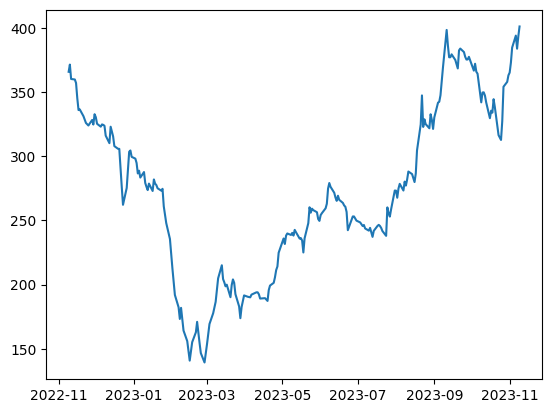

In [10]:
# Plot the Stock data
plt.plot(stock_data.Close)

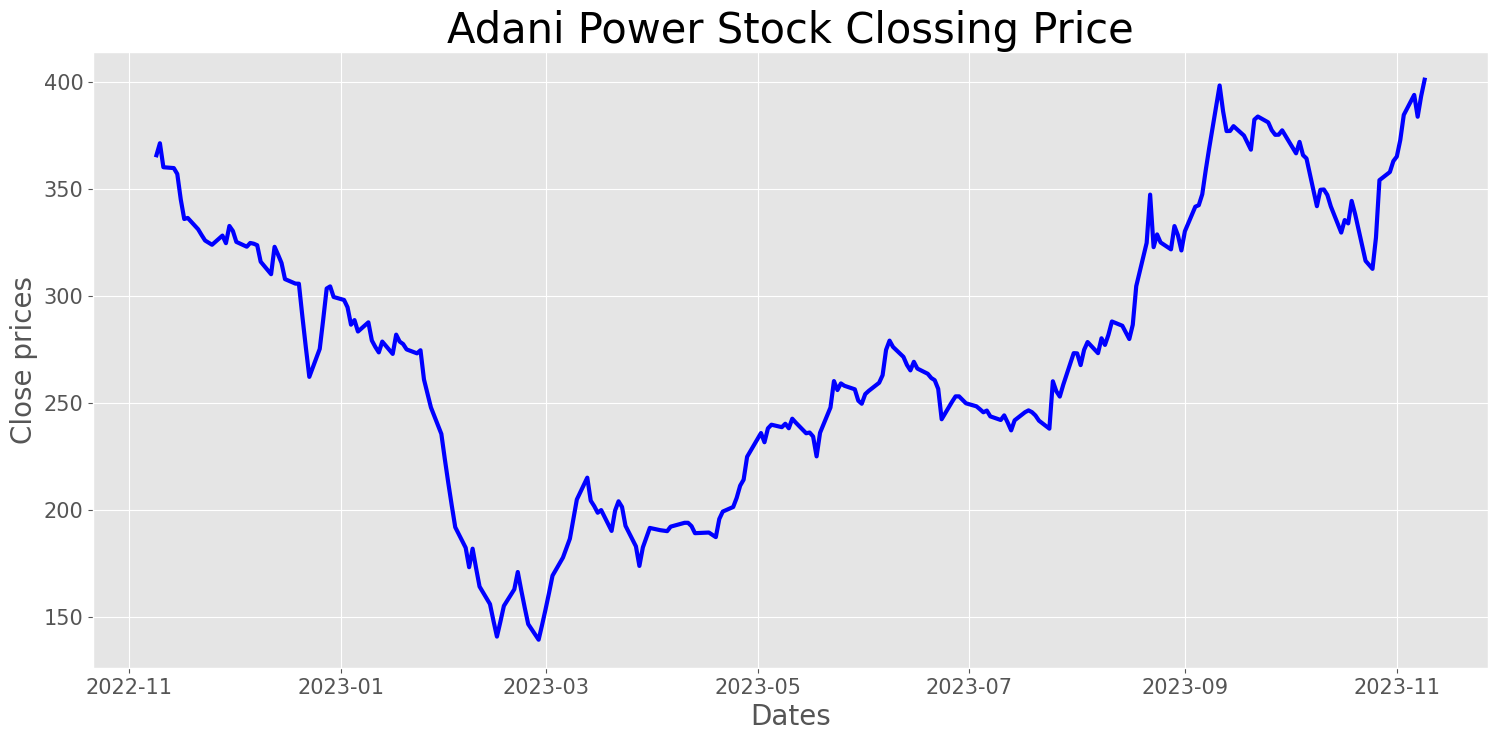

In [11]:
# making this plot more readable :
# plot the close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize= (20))
plt.xticks(fontsize = 15)
plt.ylabel('Close prices', fontsize = 20)
plt.yticks(fontsize= 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Adani Power Stock Clossing Price', fontsize= 30 )
plt.show()

(array([14., 19., 24., 25., 41., 36., 16., 38., 19., 18.]),
 array([139.350006, 165.525006, 191.700006, 217.875006, 244.050006,
        270.225006, 296.400006, 322.575006, 348.750006, 374.925006,
        401.100006]),
 <BarContainer object of 10 artists>)

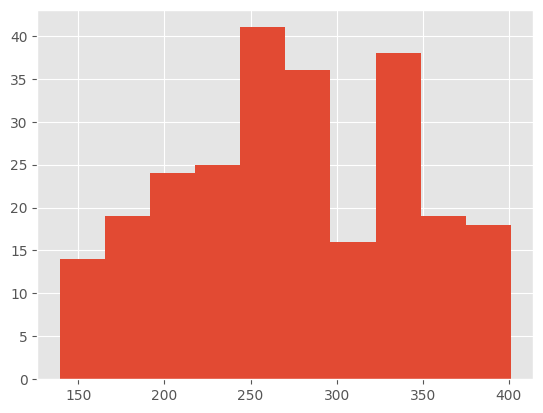

In [12]:
# Showing this stock data into histograme
plt.hist(stock_data.Close)

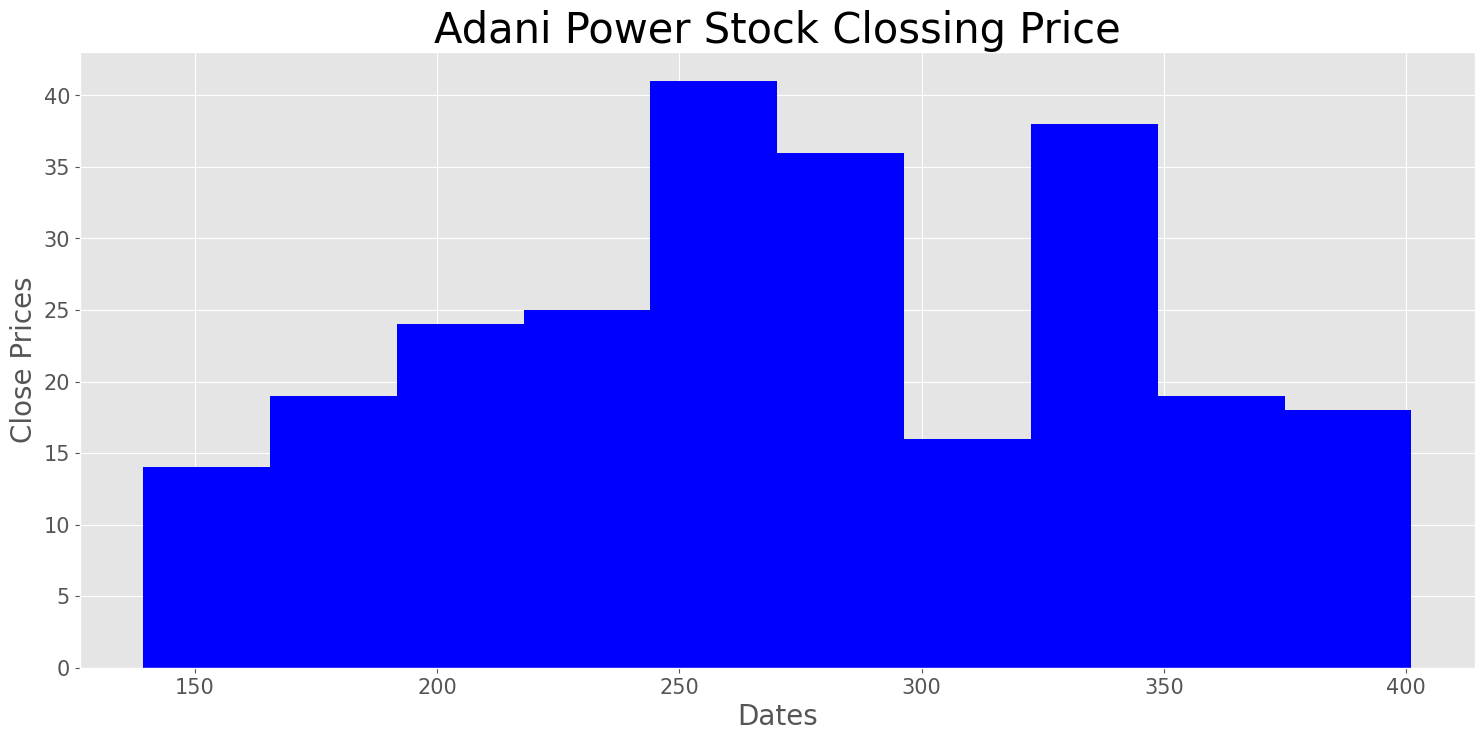

In [13]:
# making histograme  more readable
# plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Adani Power Stock Clossing Price', fontsize = 30)
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

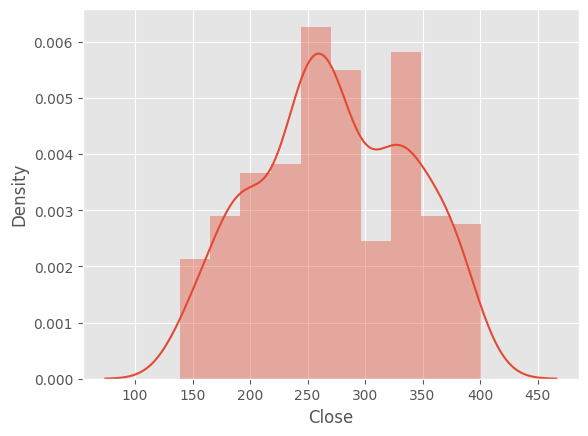

In [14]:
# showing in displot aslo
import seaborn as sns
sns.distplot(stock_data.Close)

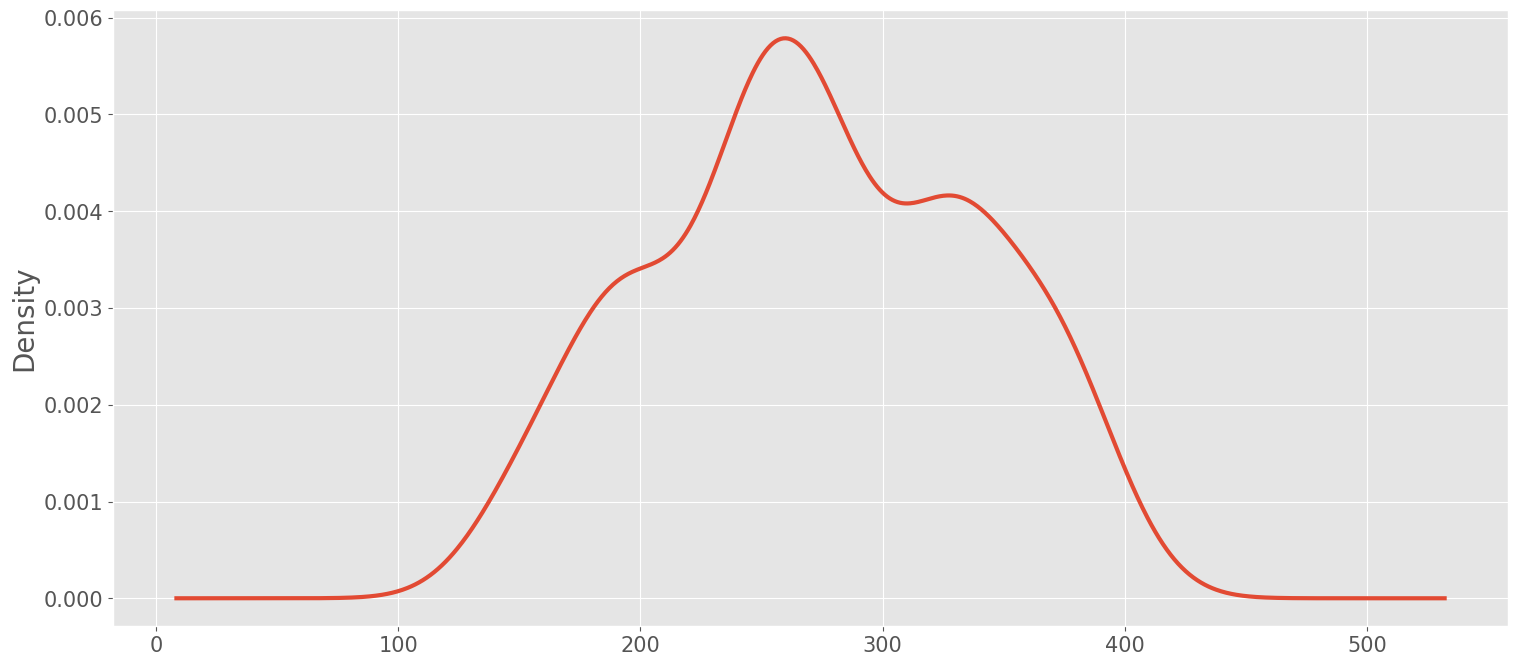

In [15]:
# Distribution of the Close price
df_close = stock_data['Close']
df_close.plot(kind = 'kde',figsize = (18,8), linewidth= 3 )
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [16]:
# Plot the Rolling mean and Standard deviation of the Time Series Data

In [17]:
stock_data['Close']

Date
2022-11-09    365.799988
2022-11-10    371.399994
2022-11-11    360.200012
2022-11-14    359.799988
2022-11-15    357.049988
                 ...    
2023-11-03    384.649994
2023-11-06    394.000000
2023-11-07    383.799988
2023-11-08    393.399994
2023-11-09    401.100006
Name: Close, Length: 250, dtype: float64

In [18]:
# Rolling mean 
stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [19]:
# check the rolling mean 
rolmean = stock_data['Close'].rolling(12).mean()
rolmean

Date
2022-11-09           NaN
2022-11-10           NaN
2022-11-11           NaN
2022-11-14           NaN
2022-11-15           NaN
                 ...    
2023-11-03    347.595838
2023-11-06    352.600004
2023-11-07    355.879168
2023-11-08    360.470835
2023-11-09    367.525001
Name: Close, Length: 250, dtype: float64

In [20]:
# Check the rolling standard deviation
rolstd = stock_data['Close'].rolling(12).std()
rolstd

Date
2022-11-09          NaN
2022-11-10          NaN
2022-11-11          NaN
2022-11-14          NaN
2022-11-15          NaN
                ...    
2023-11-03    22.552848
2023-11-06    25.693257
2023-11-07    27.034590
2023-11-08    28.421093
2023-11-09    26.969857
Name: Close, Length: 250, dtype: float64

# Plotting the data Before Smoothning

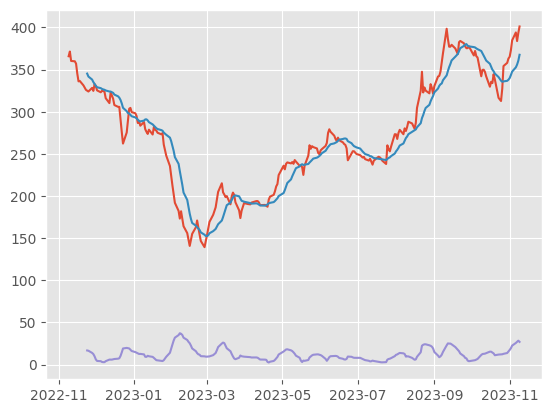

In [21]:
# now plot those values
plt.plot(stock_data.Close)   ##time series data
plt.plot(rolmean)   ## rolling mean
plt.plot(rolstd)      ## rolling std

# Plotting After Smoothning

In [22]:
rolmean = stock_data['Close'].rolling(30).mean()    ## smoothning by changing the rolling mean values

rolstd = stock_data['Close'].rolling(30).std()     ## smoothning by changing the rolling std values

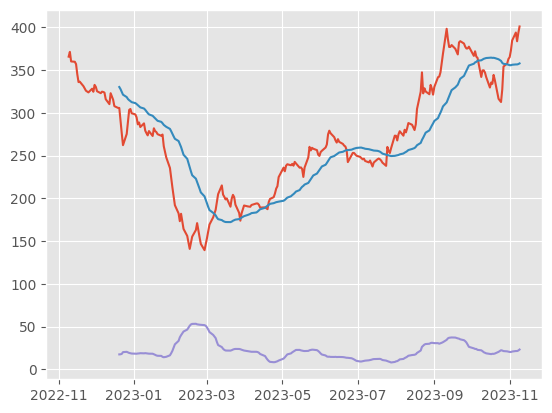

In [23]:
# now plot those values after smothining
plt.plot(stock_data.Close)   ##time series data
plt.plot(rolmean)   ## rolling mean
plt.plot(rolstd)      ## rolling std

# Stationarity Check

In [24]:
# importing the adfuller for checking the stationarity
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [25]:
adft

(-0.875900424719507,
 0.795805131159639,
 1,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 1631.1543128405356)

In [26]:
adft[0:4]

(-0.875900424719507, 0.795805131159639, 1, 248)

In [27]:
## indexing on adft values
pd.Series(adft[0:4], index= ['test stats', 'P-value', 'lag', 'data points'])

test stats      -0.875900
P-value          0.795805
lag              1.000000
data points    248.000000
dtype: float64

## make a criteria for the p-value
null hypothesis = data is non stationary

P-value= 0.795805

p < 0.05
reject null hypothesis

p > 0.05
accept null hypothesis

In [28]:
# creating a function where all stationarity details shuould be present

#Test for staionarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for adft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

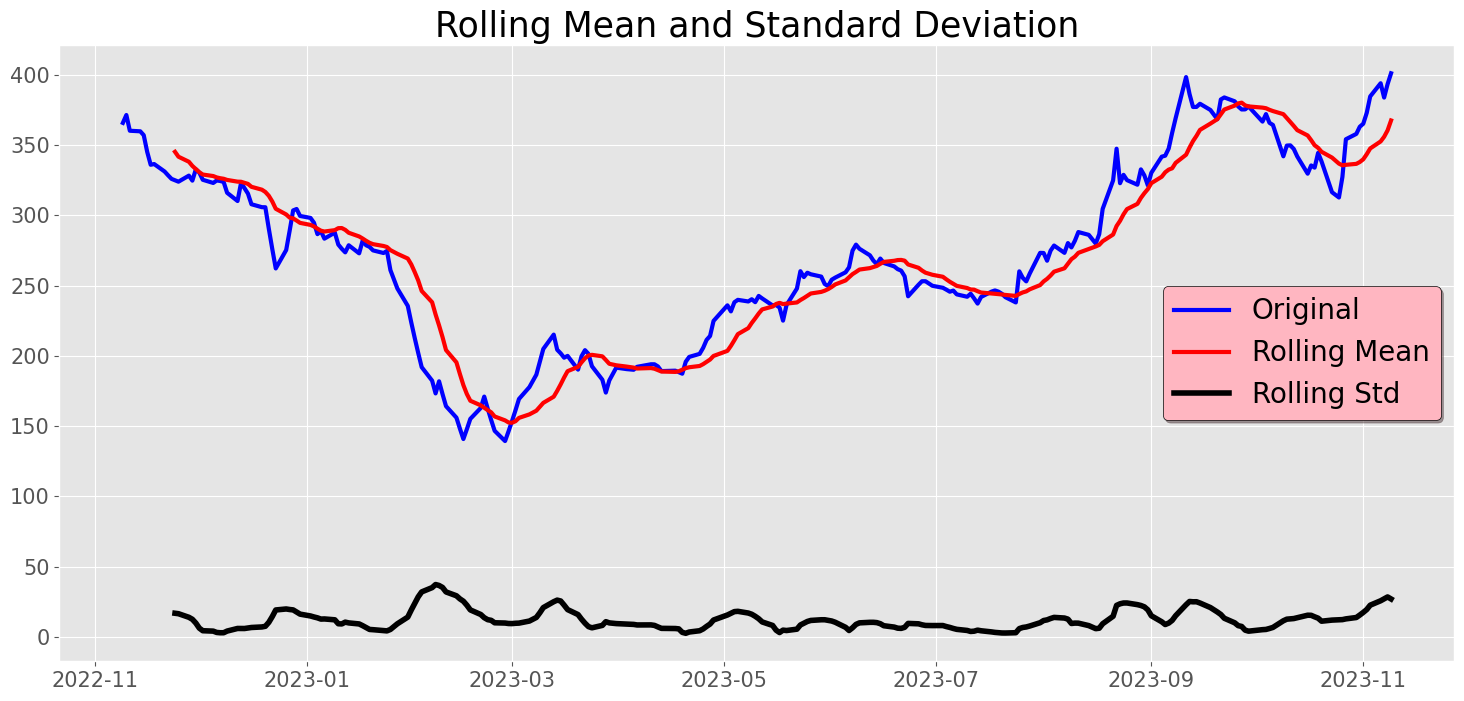

Results of dickey fuller test
Test Statistics                 -0.875900
p-value                          0.795805
No. of lags used                 1.000000
Number of observations used    248.000000
critical value (1%)             -3.456996
critical value (5%)             -2.873266
critical value (10%)            -2.573019
dtype: float64


In [29]:
test_stationarity(stock_data.Close)

In [30]:
 ## smothning on stock data 
    
# creating a function where all stationarity details shuould be present

#Test for staionarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(30).mean() # rolling mean
    rolstd = timeseries.rolling(30).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

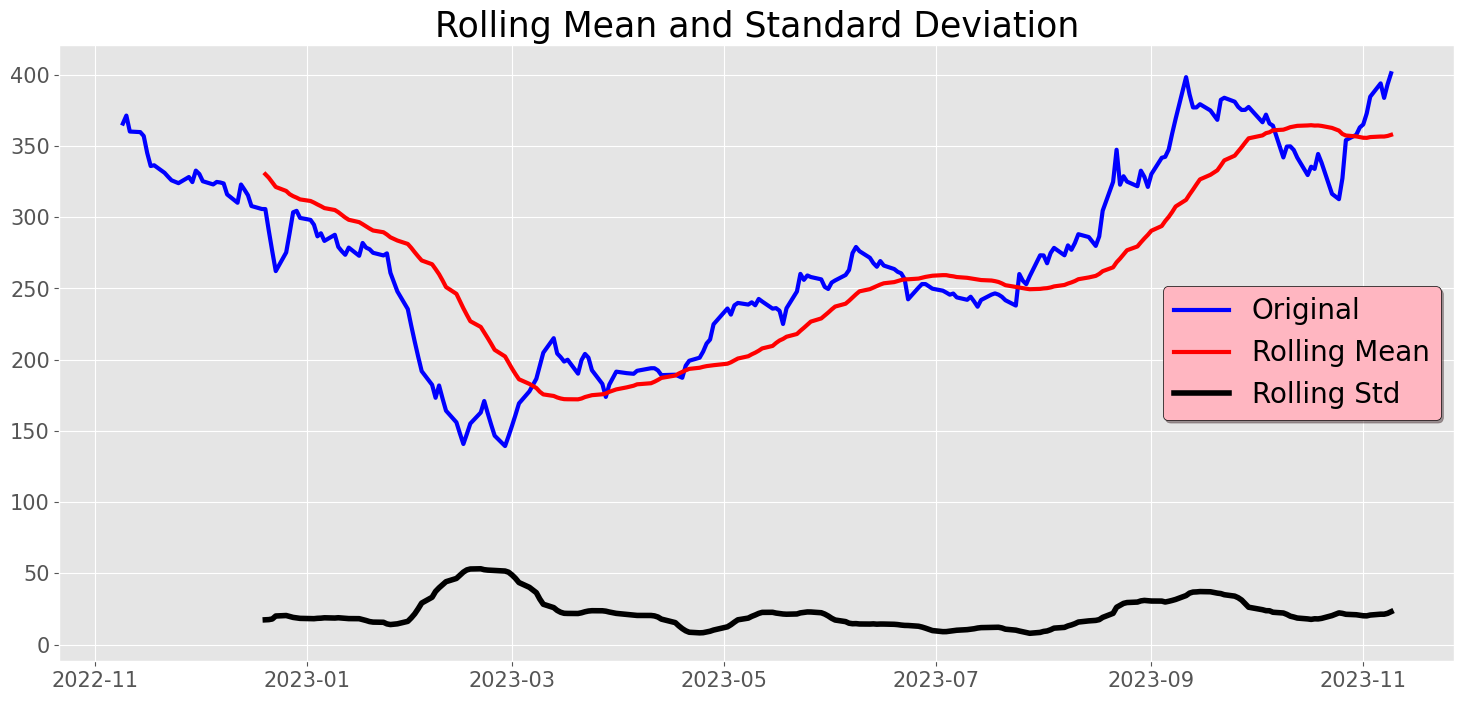

Results of dickey fuller test
Test Statistics                 -0.875900
p-value                          0.795805
No. of lags used                 1.000000
Number of observations used    248.000000
critical value (1%)             -3.456996
critical value (5%)             -2.873266
critical value (10%)            -2.573019
dtype: float64


In [31]:
test_stationarity(stock_data.Close)

# Outlier Dectection

In [32]:
# there is no missing value in the dataset
stock_data.Close.isnull().sum()

0

<Axes: >

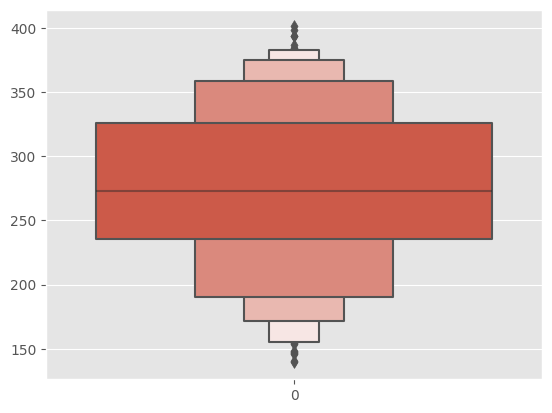

In [33]:
sns.boxenplot(stock_data.Close)

In [34]:
stock_data.Close.describe()

count    250.000000
mean     273.129200
std       65.525775
min      139.350006
25%      235.625004
50%      273.075012
75%      325.787506
max      401.100006
Name: Close, dtype: float64

In [35]:
# finding the IQR
iqr_25 = stock_data.Close.quantile(0.25)
iqr_75 = stock_data.Close.quantile(0.75)

In [36]:
iqr_25

235.62500375000002

In [37]:
iqr_75

325.787506

In [38]:
iqr = iqr_75 - iqr_25
iqr

90.16250224999999

In [39]:
upper_limit = iqr_75 + 1.5*iqr
lower_limit = iqr_25 - 1.5*iqr

print('Upper Limit', upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 461.031259375
Lower Limit 100.38125037500004


In [40]:
stock_data[stock_data.Close > upper_limit]

,Close
Date,


In [41]:
stock_data[stock_data.Close < lower_limit]

,Close
Date,


In [42]:
# Capping 

new_df_cap = stock_data.copy()

new_df_cap['Close'] = np.where(
    new_df_cap['Close'] > upper_limit, 
    upper_limit,
    np.where(
        new_df_cap['Close'] < lower_limit,
        lower_limit,
        new_df_cap['Close']
    )
)

In [43]:
new_df_cap.shape

(250, 1)

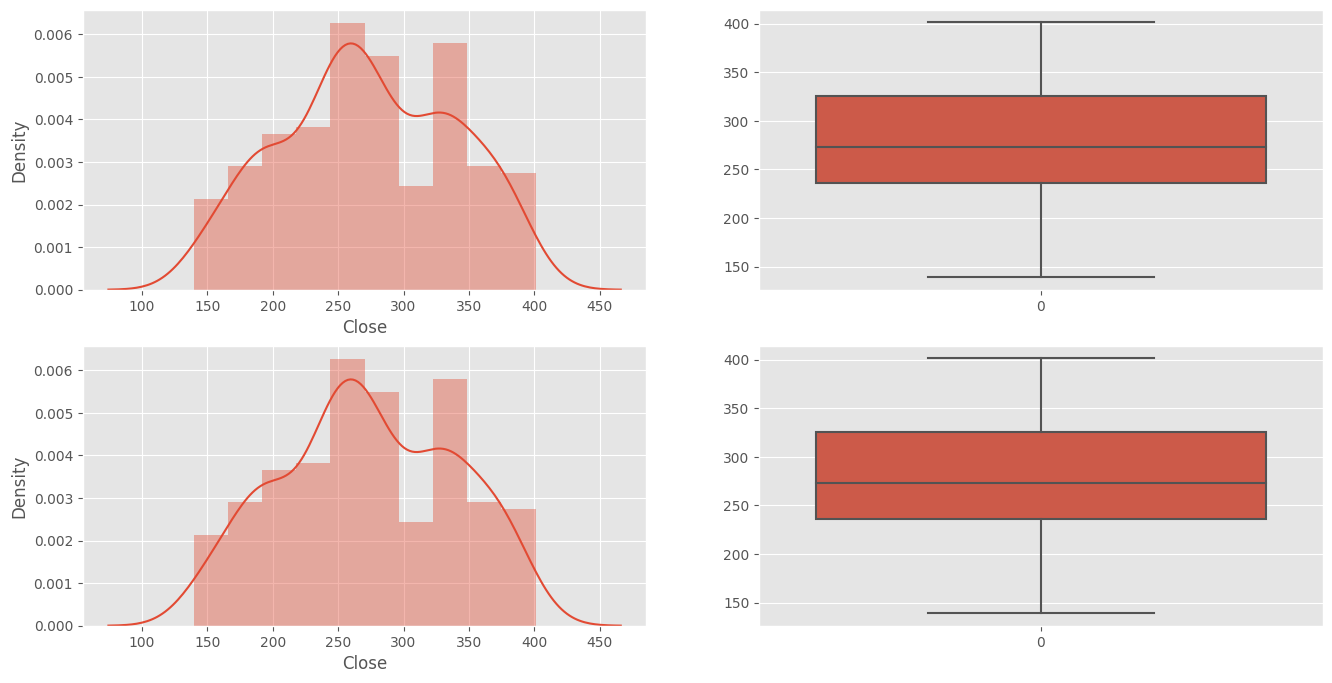

In [44]:
# camparing 

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(stock_data['Close'])

plt.subplot(2,2,2)
sns.boxplot(stock_data['Close'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Close'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Close'])

plt.show()

<Axes: >

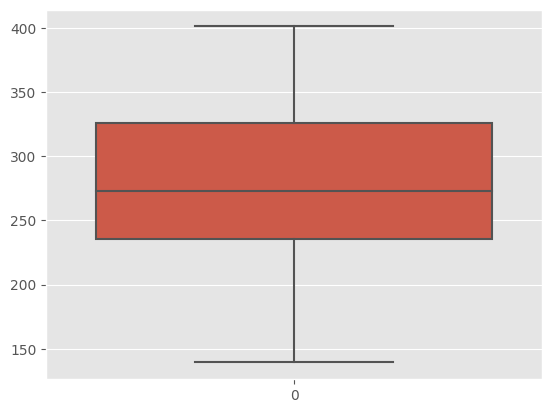

In [45]:
sns.boxplot(stock_data['Close'])

# Observation :
now we capping all the outliers from the data set. now our data is completly outlier free. 

# Time series Decomposition

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(stock_data[['Close']], period= 12)
result

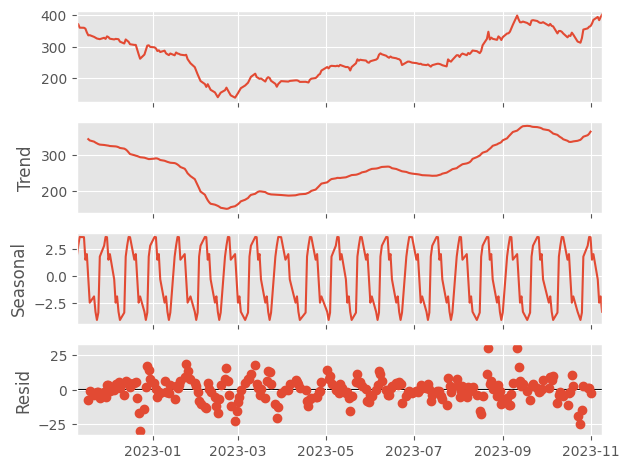

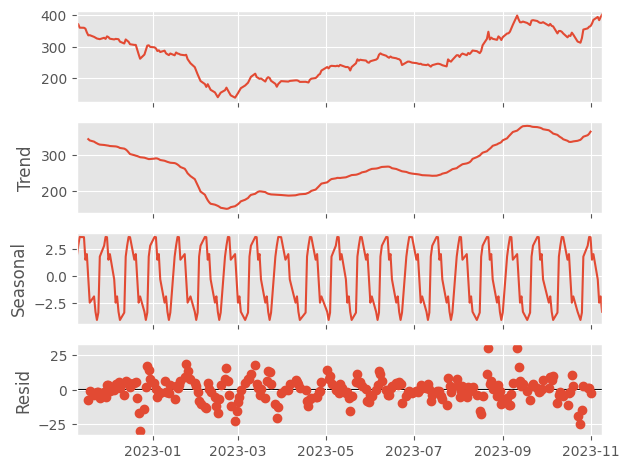

In [47]:
# plot the result 
result.plot()

# Observation 
1. Here we got two plot: one for additive and second for multiplicative, we can go with one also but defolt this
go will both perametter, we can chage it with our conviniant.

2. And we also check seperatly the trend, seasonl, resid values with graph 

# ACF AND PACF

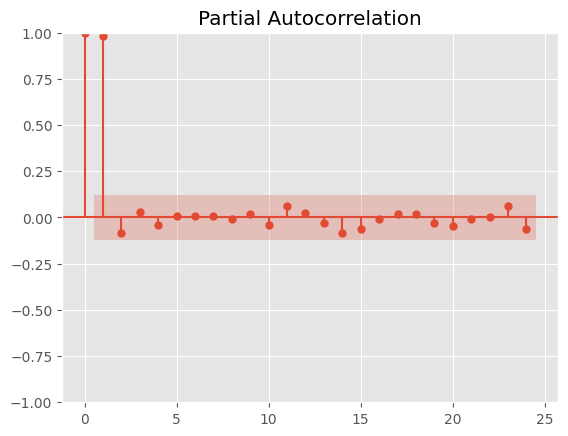

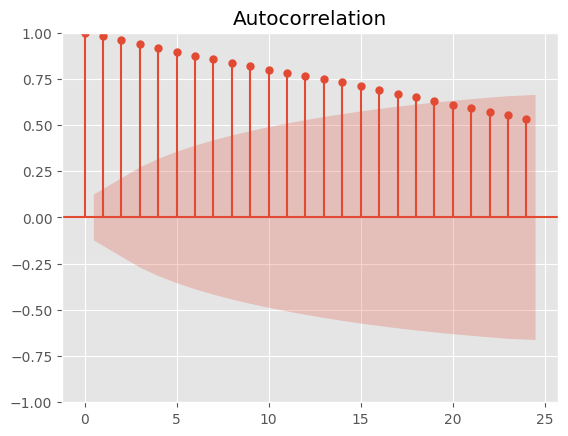

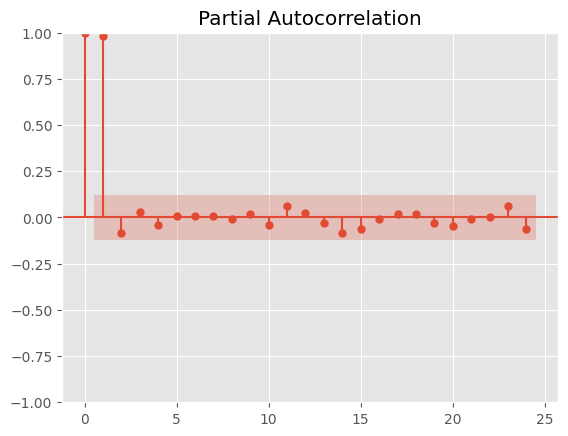

In [48]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of the data 

1. fill the miss(here not required)

2. convert data into stationary time series

3. if necessary then normalize the data(here not required)

4. split the data into train and test

5. clean the data by removing the outlier (here not required)

In [49]:
# non stationary to stationary 
df_close = stock_data['Close']
df_close

Date
2022-11-09    365.799988
2022-11-10    371.399994
2022-11-11    360.200012
2022-11-14    359.799988
2022-11-15    357.049988
                 ...    
2023-11-03    384.649994
2023-11-06    394.000000
2023-11-07    383.799988
2023-11-08    393.399994
2023-11-09    401.100006
Name: Close, Length: 250, dtype: float64

In [50]:
df_close.diff(2)     ## chaninging values in diff

Date
2022-11-09          NaN
2022-11-10          NaN
2022-11-11    -5.599976
2022-11-14   -11.600006
2022-11-15    -3.150024
                ...    
2023-11-03    19.449982
2023-11-06    21.049988
2023-11-07    -0.850006
2023-11-08    -0.600006
2023-11-09    17.300018
Name: Close, Length: 250, dtype: float64

In [51]:
df_close = df_close.diff()
df_close = df_close.dropna()

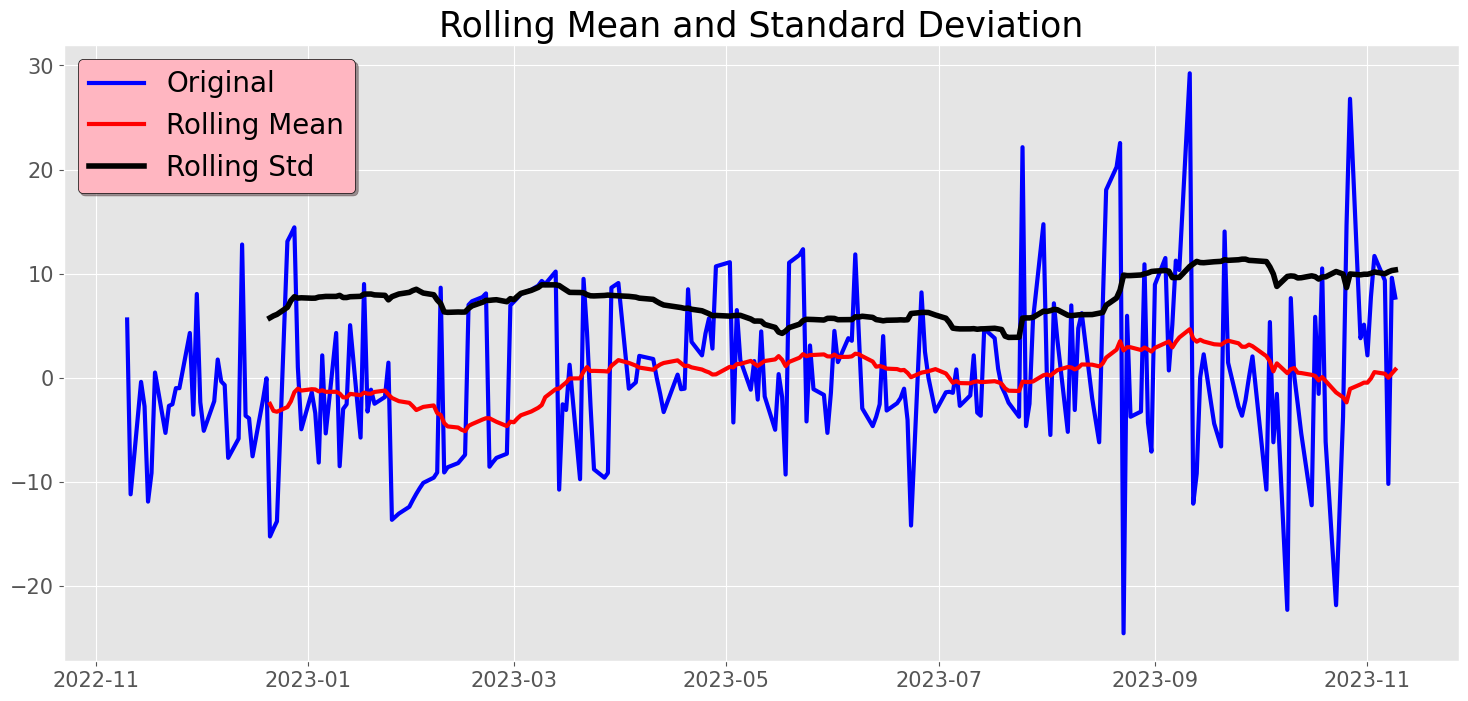

Results of dickey fuller test
Test Statistics               -1.250145e+01
p-value                        2.800604e-23
No. of lags used               0.000000e+00
Number of observations used    2.480000e+02
critical value (1%)           -3.456996e+00
critical value (5%)           -2.873266e+00
critical value (10%)          -2.573019e+00
dtype: float64


In [52]:
# now passing df-close data into test-stationarity function 
test_stationarity(df_close)

In [53]:
# train test split our data
df_close[0:-40]   ##training data

Date
2022-11-10     5.600006
2022-11-11   -11.199982
2022-11-14    -0.400024
2022-11-15    -2.750000
2022-11-16   -11.899994
                ...    
2023-09-05     0.700012
2023-09-06     5.099976
2023-09-07    11.250000
2023-09-08    10.350006
2023-09-11    29.250000
Name: Close, Length: 209, dtype: float64

In [54]:
df_close[-40:]   ##testing data

Date
2023-09-12   -12.100006
2023-09-13    -9.199982
2023-09-14     0.049988
2023-09-15     2.250000
2023-09-18    -4.399994
2023-09-20    -6.600006
2023-09-21    14.050018
2023-09-22     1.449982
2023-09-25    -2.750000
2023-09-26    -3.649994
2023-09-27    -2.149994
2023-09-28     0.049988
2023-09-29     2.050018
2023-10-03   -10.750000
2023-10-04     5.349976
2023-10-05    -6.199982
2023-10-06    -1.550018
2023-10-09   -22.299988
2023-10-10     7.649994
2023-10-11     0.149994
2023-10-12    -2.549988
2023-10-13    -5.350006
2023-10-16   -12.250000
2023-10-17     5.850006
2023-10-18    -1.549988
2023-10-19    10.500000
2023-10-20    -6.150024
2023-10-23   -21.849976
2023-10-25    -3.750000
2023-10-26    14.649994
2023-10-27    26.799988
2023-10-30     3.800018
2023-10-31     5.099976
2023-11-01     2.150024
2023-11-02     7.750000
2023-11-03    11.699982
2023-11-06     9.350006
2023-11-07   -10.200012
2023-11-08     9.600006
2023-11-09     7.700012
Name: Close, dtype: float64

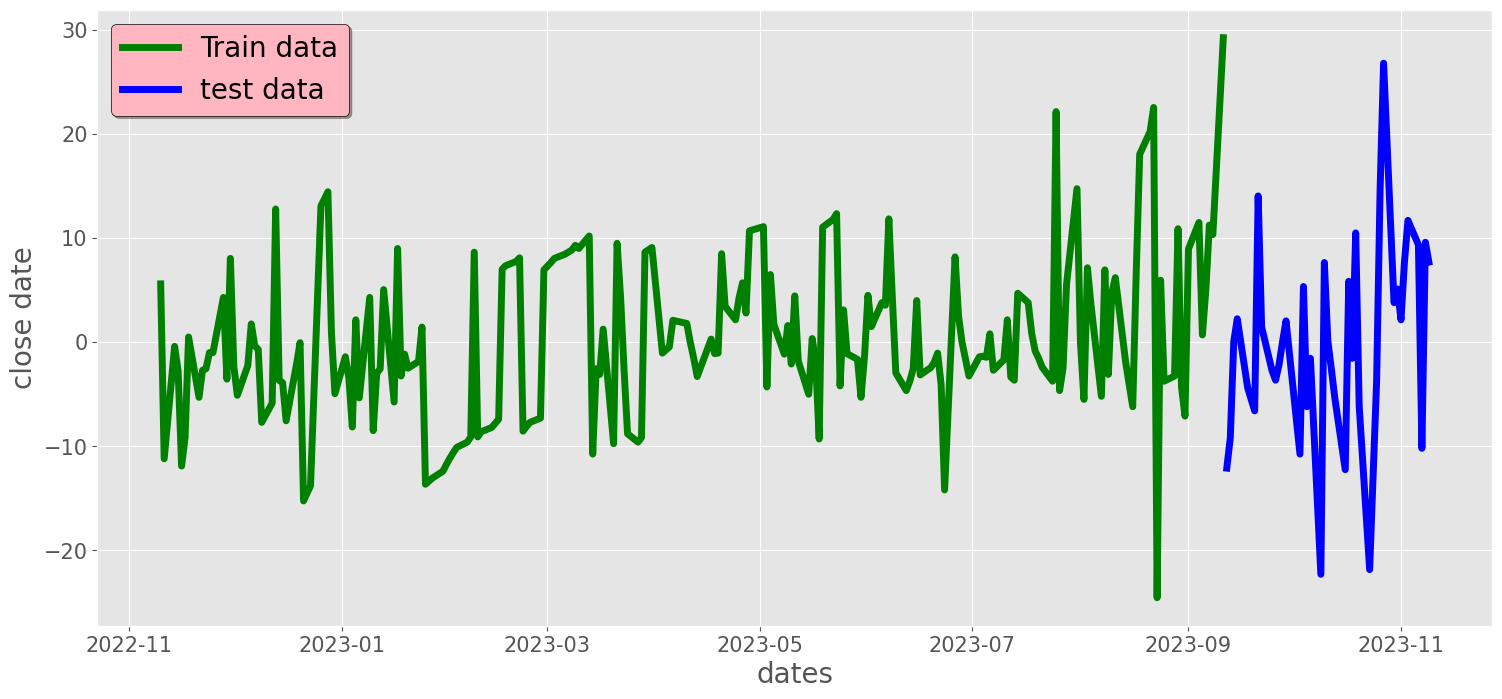

In [55]:
##ploting the train test splited data into graph

# split data into train and testing data
train_data = df_close[0:-40]
test_data = df_close[-40:] 
plt.figure(figsize= (18,8))
plt.grid(True)
plt.xlabel('dates', fontsize = 20 )
plt.ylabel('close date', fontsize = 20)
plt.xticks(fontsize = 15 )
plt.yticks(fontsize = 15 )
plt.plot(train_data, 'green', label = 'Train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

# Model Building

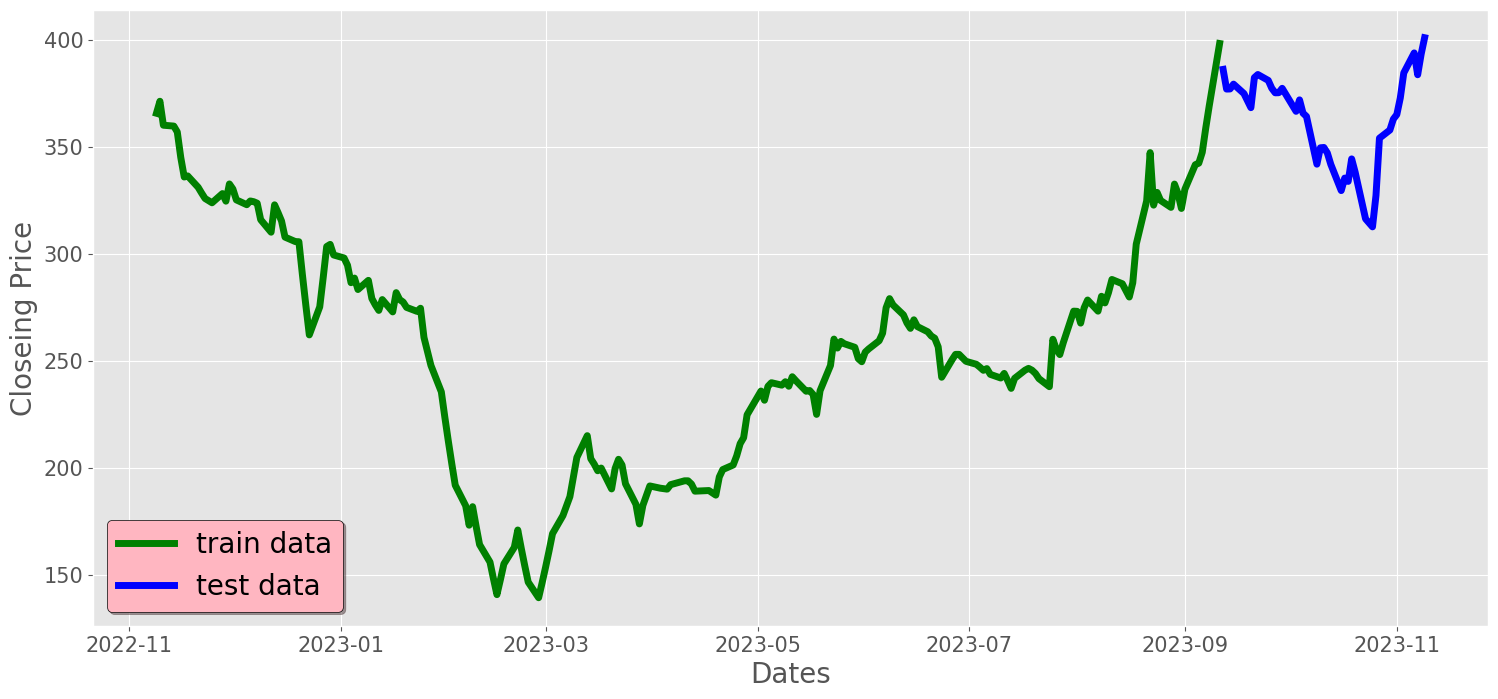

In [56]:
train_data = stock_data['Close'][0:-40]       ##train data
test_data = stock_data['Close'][-40:]           ## testing data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closeing Price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

In [57]:
stock_data['Close']

Date
2022-11-09    365.799988
2022-11-10    371.399994
2022-11-11    360.200012
2022-11-14    359.799988
2022-11-15    357.049988
                 ...    
2023-11-03    384.649994
2023-11-06    394.000000
2023-11-07    383.799988
2023-11-08    393.399994
2023-11-09    401.100006
Name: Close, Length: 250, dtype: float64

In [58]:
249-40  ## 0-->209 == training data, 209-->249 == testing data

209

In [59]:
# importing the libraries 
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [60]:
history = [x for x in train_data]

In [61]:
# passing train data into the arima model 
model = ARIMA(history, order= (1,1,1) )      ##p,d,q values ---> lags values

In [62]:
model = model.fit()   ##fiting the model 

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  210
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -713.376
Date:                Thu, 09 Nov 2023   AIC                           1432.752
Time:                        19:21:42   BIC                           1442.779
Sample:                             0   HQIC                          1436.806
                                - 210                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4868      0.168      2.893      0.004       0.157       0.817
ma.L1         -0.2124      0.201     -1.058      0.290      -0.606       0.181
sigma2        53.9485      4.249     12.697      0.000      45.621      62.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.51
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.16
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Now we want to predict Or Forecast the next value

In [64]:
model.forecast()

array([407.18606043])

In [65]:
# geting the MSE value
mean_squared_error([test_data[0]], model.forecast())

436.22802153554466

In [66]:
## geting the RMSE value 
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

20.886072429625074

In [67]:
def train_arima_model(X, y, arima_order):
    history = [x for x in X]  ## prepare training dataset
    predictions = list()     ## make prediction list

    for t in range(len(y)):
        model  = ARIMA(history, order= arima_order)
        model_fit = model.fit()
        yhat  = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])

    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [68]:
## evaluate different combinations of p,d,q values for an ARIMA model to get the best order for ARIMA model
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE= %.3f'  %(order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE= %.3f'  %(best_cfg, best_score))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 100.786
ARIMA(0, 0, 1) RMSE= 52.635
ARIMA(0, 0, 2) RMSE= 44.402
ARIMA(0, 1, 0) RMSE= 9.550
ARIMA(0, 1, 1) RMSE= 9.727
ARIMA(0, 1, 2) RMSE= 9.878
ARIMA(0, 2, 0) RMSE= 13.903
ARIMA(0, 2, 1) RMSE= 10.235
ARIMA(0, 2, 2) RMSE= 10.088
ARIMA(1, 0, 0) RMSE= 9.548
ARIMA(1, 0, 1) RMSE= 9.720
ARIMA(1, 0, 2) RMSE= 9.872
ARIMA(1, 1, 0) RMSE= 9.869
ARIMA(1, 1, 1) RMSE= 9.950
ARIMA(1, 1, 2) RMSE= 9.952
ARIMA(1, 2, 0) RMSE= 12.823
ARIMA(1, 2, 1) RMSE= 10.118
ARIMA(1, 2, 2) RMSE= 10.140
ARIMA(2, 0, 0) RMSE= 9.864
ARIMA(2, 0, 1) RMSE= 9.952


In [ ]:
# now with best arima values create our final model

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(1,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

# Observation:
- For our model the best ARIMA Value is == **(1,0,0)**
- **RMSE of ARIMA** Model = **9.547**

In [ ]:
## now ploting the predicted data 

plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
# Now converted forecast values into series
fc_series = pd.Series(predictions, index= test_data.index)

# Now plot the fc-series

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# now plotting forecast the future calues in the plot 
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
# Let's check with SARIMA Model also 

## evaluate parameters for sarimax
import warnings 
warnings.filterwarnings('ignore')

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(40), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(40), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

# Observation : 
- in this Adani Power Limited stock price data there is no need to apply or include sessional factor beacause our actual data in zik-zak.

- we make sure that our order of arima is should be in correct format.

- Here we forecaste the Close price for the next 60 days.